# Silicon Band Gap Energy

In [60]:
import numpy as np
import matplotlib.pyplot as plt
# We will use the scipy curve_fit function to fit a model to data.
from scipy.optimize import curve_fit

Enter data from table as numpy arrays

In [61]:
t_cel = np.array([-15., -10., -8., -6., -4.2, -2.3, 0., 2., 
                3.6, 5.8, 8.2, 10., 12.8, 16.2, 20.])
adu = np.array([13, 15, 16, 17, 19, 22, 24, 28, 32, 37, 
                43, 50, 62, 89, 139])

Convert Celsius to Kelvin

In [62]:
t_kel = t_cel+273.15
t_kel

array([ 258.15,  263.15,  265.15,  267.15,  268.95,  270.85,  273.15,
        275.15,  276.75,  278.95,  281.35,  283.15,  285.95,  289.35,
        293.15])

In [63]:
t_kel_inverse = 1/t_kel
t_kel_inverse

array([ 0.00387372,  0.00380011,  0.00377145,  0.00374322,  0.00371816,
        0.00369208,  0.00366099,  0.00363438,  0.00361337,  0.00358487,
        0.00355429,  0.0035317 ,  0.00349711,  0.00345602,  0.00341122])

Convert ADU (counts) to electrons

In [64]:
electrons = adu*2.3
electrons

array([  29.9,   34.5,   36.8,   39.1,   43.7,   50.6,   55.2,   64.4,
         73.6,   85.1,   98.9,  115. ,  142.6,  204.7,  319.7])

Convert electrons to electrons per second

In [65]:
electrons_per_sec = electrons /120
electrons_per_sec

array([ 0.24916667,  0.2875    ,  0.30666667,  0.32583333,  0.36416667,
        0.42166667,  0.46      ,  0.53666667,  0.61333333,  0.70916667,
        0.82416667,  0.95833333,  1.18833333,  1.70583333,  2.66416667])

## Plot dark current (e-/sec) vs. inverse temperature
Make a plot in the cell below

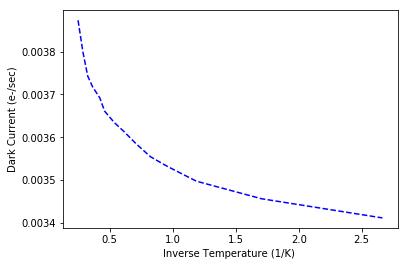

In [85]:
plt.xlabel('Inverse Temperature (1/K) ')
plt.ylabel('Dark Current (e-/sec)')
plt.plot(X, Y, color='b', marker='None', linestyle='--');
plt.show()


## Fit for the band gap energy
We will try to fit a model for dark current of the form

$D = \alpha e^{-e_g/2k_bT}$

In [78]:
# The Boltzmann constant
k_b = 8.6175e-5

def dark_current(t_k, alpha, e_g):
    """
    Analytic expression for dark current as a function of temperature.
    
    Parameters
    ----------
    t_k : numpy.ndarray
        Temperature in Kelvin
    alpha : float
        Constant coefficient in front of exponential funtion.
    e_g : float
        Band gap energy in eV.
    
    Returns
    -------
    dark_current : numpy.ndarray
        Dark current in electrons/pixel/second.
    """
    dark_current = alpha * np.exp(-e_g / (2 * k_b * t_k))
    return dark_current

## Inital guesses for parameters
We need initial guesses for the values of $\alpha$ and $e_g$.

In [68]:
t_0 = t_kel[-1]
d_0 = electrons_per_sec[-1]

alpha_0 =  d_0 / np.exp(-1.1 / (2 * k_b * t_0))
e_g_0 = 1.1

## Least squares fit

In [73]:
p_opt, p_cov = curve_fit(dark_current, t_kel, electrons_per_sec, p0=[alpha_0, e_g_0])

# Errors in the fit
sig_alpha, sig_e_g = np.sqrt(np.diag(p_cov))

## Best fit values

In [74]:
alpha_fit, e_g_fit = p_opt
print(alpha_fit)
print(e_g_fit)

77098910165.4
1.22052268431


## Plot the data and best fit model

Make a plot in the cell below. To plot the model, use the `dark_current` function with `alpha_fit` and `e_g_fit`.

In [89]:
dark_current(t_kel, alpha_fit, e_g_fit)

array([ 0.09404718,  0.15838459,  0.19403019,  0.23697677,  0.28297909,
        0.34038656,  0.42421434,  0.512186  ,  0.59436044,  0.72726884,
        0.90311812,  1.05982815,  1.35392146,  1.81123656,  2.48745996])

In [ ]:
plt.plot(t_kel_inverse, dark_current, color='b', marker='None', linestyle='--');
plt.show()

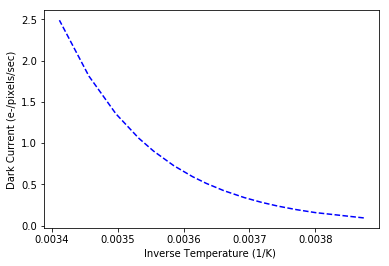

In [91]:
plt.xlabel('Inverse Temperature (1/K) ')
plt.ylabel('Dark Current (e-/pixels/sec)')
plt.plot(t_kel_inverse, dark_current(t_kel, alpha_fit, e_g_fit), color='b', marker='None', linestyle='--');
plt.show()